> ### Start with small data if we have to many dimensions 
- 分治法\
$\omega ^* = \mathop{\arg\min}_\omega cost(\omega)$

>### Gradient Descent Algorithm
- <image>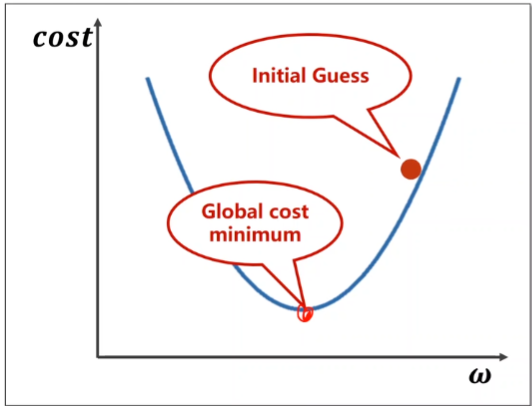</image>
- 梯度是什么？
    - 梯度即导数变化最大的值，其方向为导数变化最大的方向。
    $$
    \frac{\partial f}{\partial x}=\lim_{\triangle x\rightarrow\infty}\frac{f(x+\triangle x)-f(x)}{\triangle x}
    $$
    - 若设$\triangle x>0$,则对于增函数，梯度为上升方向，对于减函数，梯度为下降方向。如此方向都不是离极值点渐进的方向，因此需要取梯度下降的方向即梯度的反方向作为变化方向。
- 算法步骤（贪心法）
    - Given initial value
    - calculate 梯度
    - Update
        - $\omega = \omega - \alpha \frac{\partial cost}{\partial \omega}$
    - Stop
- Limitations
    - 对于非凸函数，有时只能找到局部最优点，找不到全局最优点
    - 会有鞍点：水平曲线，无法迭代更新

Predict(after training) 4 7.999777758621207


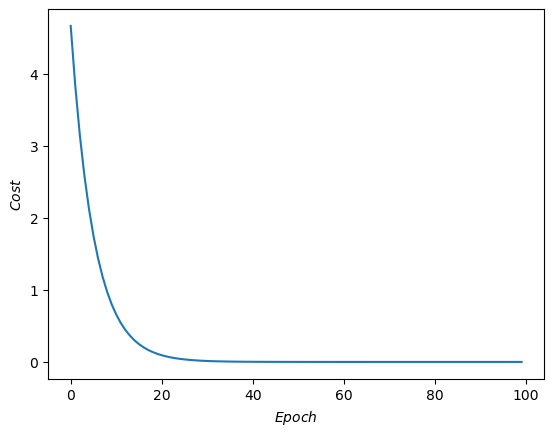

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
_cost = []
w = 1.0
#前馈计算
def forward(x):
    return x * w
#求MSE
def cost(xs, ys):
    cost = 0
    for x, y in zip(xs,ys):
        y_pred = forward(x)
        cost += (y_pred-y) ** 2
    return cost/len(xs)
#求梯度
def gradient(xs, ys):
    grad = 0
    for x, y in zip(xs,ys):
        temp = forward(x)
        grad += 2*x*(temp-y)
    return grad / len(xs)

for epoch in range(100):
     cost_val = cost(x_data, y_data)
     _cost.append(cost_val)
     grad_val = gradient(x_data, y_data)
     w -= 0.01*grad_val
    #  print("Epoch: ",epoch, "w = ",w ,"loss = ", cost_val)
print("Predict(after training)",4,forward(4))

#绘图
plt.plot(list(range(100)), _cost)
plt.ylabel(r"$Cost$")
plt.xlabel(r'$Epoch$')
plt.show()

>### Stochastic Gradient Descent(随机)
- mean:拿单个样本的loss求导
- 随机选单个样本的损失为标准
    - 即原公式变为
        $$
        \omega = \omega - \alpha \frac{\partial loss}{\partial \omega}
    - $$
    - 其中
        $$
        \frac{\partial loss_n}{\partial \omega} = 2 x_n(x_n \omega - y_n)
        $$

In [12]:
#随机梯度下降
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = 1.0
#前馈计算
def forward(x):
    return x * w
#求单个loss
def loss(x, y):
    y_pred = forward(x)
    return (y_pred-y) ** 2
#求梯度
def gradient(x, y):
    return 2*x*(x*w-y)
print("Predict(after training)",4,forward(4))

for epoch in range(100):
    for x, y in zip(x_data,y_data):
        grad=gradient(x,y) 
        # 动态更新，只能单线程
        w -= 0.01*grad
        print("\tgrad:  ",x,y,grad)
        l = loss(x,y)
    print("progress: ",epoch,"w=",w,"loss=",l)
print("Predict(after training)",4,forward(4))

Predict(after training) 4 4.0
	grad:   1.0 2.0 -2.0
	grad:   2.0 4.0 -7.84
	grad:   3.0 6.0 -16.2288
progress:  0 w= 1.260688 loss= 4.919240100095999
	grad:   1.0 2.0 -1.478624
	grad:   2.0 4.0 -5.796206079999999
	grad:   3.0 6.0 -11.998146585599997
progress:  1 w= 1.453417766656 loss= 2.688769240265834
	grad:   1.0 2.0 -1.093164466688
	grad:   2.0 4.0 -4.285204709416961
	grad:   3.0 6.0 -8.87037374849311
progress:  2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad:   1.0 2.0 -0.8081896081960389
	grad:   2.0 4.0 -3.1681032641284723
	grad:   3.0 6.0 -6.557973756745939
progress:  3 w= 1.701247862192685 loss= 0.8032755585999681
	grad:   1.0 2.0 -0.59750427561463
	grad:   2.0 4.0 -2.3422167604093502
	grad:   3.0 6.0 -4.848388694047353
progress:  4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad:   1.0 2.0 -0.44174208101320334
	grad:   2.0 4.0 -1.7316289575717576
	grad:   3.0 6.0 -3.584471942173538
progress:  5 w= 1.836707389300983 loss= 0.2399802903801062
	grad:   1.0 2.0 -0.326

>### Mini-batch Gradient Descent
- 在前面的阐述中，普通的梯度下降算法利用数据整体，不容易避免鞍点，算法性能上欠佳，但算法效率高。随机梯度下降需要利用每个的单个数据，虽然算法性能上良好，但计算过程环环相扣无法将样本抽离开并行运算，因此算法效率低，时间复杂度高。

- 综上可采取一种折中的方法，即批量梯度下降方法。

- 将若干个样本分为一组，记录一组的梯度用以代替随机梯度下降中的单个样本。

- **该方法最为常用，也是默认接口**